In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
from sklearn.cluster import MeanShift
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
X_pca=pd.read_excel(r"PCA_data.xlsx")
df=pd.read_excel(r'imp_features.xlsx')

In [3]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd
import numpy as np

# Replace X_pca with your preprocessed dataset
# Ensure the data is scaled appropriately

# Estimate bandwidth range
bandwidth_range = np.linspace(estimate_bandwidth(X_pca, quantile=0.2), 
                               estimate_bandwidth(X_pca, quantile=0.8), 
                               num=10)

# Store results
results = []

# Hyperparameter tuning
for bandwidth in bandwidth_range:
    try:
        clustering = MeanShift(bandwidth=bandwidth)
        labels = clustering.fit_predict(X_pca)
        
        # Compute metrics
        if len(set(labels)) > 1:  # At least 2 clusters to compute metrics
            sil_score = silhouette_score(X_pca, labels)
            dbi_score = davies_bouldin_score(X_pca, labels)
            ch_score = calinski_harabasz_score(X_pca, labels)
            unique, frequency = np.unique(labels, 
                              return_counts = True)
            results.append((unique, frequency,bandwidth, len(set(labels)), sil_score, dbi_score, ch_score))
            
            print(f"Bandwidth: {bandwidth:.2f}, Clusters: {len(set(labels))}")
        else:
            print(f"Bandwidth: {bandwidth:.2f} resulted in a single cluster.")
    except Exception as e:
        print(f"Error with bandwidth={bandwidth:.2f}: {e}")

# Convert results to a DataFrame
results_df = pd.DataFrame(
    results, columns=['unique','frequency','Bandwidth', 'Num_Clusters', 'Silhouette_Score', 'DBI', 'CH']
)
# Best configurations
best_silhouette = results_df.loc[results_df['Silhouette_Score'].idxmax()]
best_dbi = results_df.loc[results_df['DBI'].idxmin()]
best_ch = results_df.loc[results_df['CH'].idxmax()]

print("\nBest model based on Silhouette Score:")
print(best_silhouette)
print("\nBest model based on Davies-Bouldin Index:")
print(best_dbi)
print("\nBest model based on Calinski-Harabasz Index:")
print(best_ch)


Bandwidth: 5.71, Clusters: 7
Bandwidth: 5.99, Clusters: 6
Bandwidth: 6.27, Clusters: 4
Bandwidth: 6.55, Clusters: 4
Bandwidth: 6.83, Clusters: 3
Bandwidth: 7.11, Clusters: 3
Bandwidth: 7.39, Clusters: 3
Bandwidth: 7.67, Clusters: 3
Bandwidth: 7.95, Clusters: 3
Bandwidth: 8.23, Clusters: 2

Best model based on Silhouette Score:
unique                 [0, 1]
frequency           [2023, 1]
Bandwidth            8.230845
Num_Clusters                2
Silhouette_Score      0.50799
DBI                  0.372822
CH                    6.85193
Name: 9, dtype: object

Best model based on Davies-Bouldin Index:
unique                 [0, 1]
frequency           [2023, 1]
Bandwidth            8.230845
Num_Clusters                2
Silhouette_Score      0.50799
DBI                  0.372822
CH                    6.85193
Name: 9, dtype: object

Best model based on Calinski-Harabasz Index:
unique                  [0, 1, 2, 3, 4, 5, 6]
frequency           [1990, 2, 1, 1, 27, 2, 1]
Bandwidth               

In [4]:
results_df

,unique,frequency,Bandwidth,Num_Clusters,Silhouette_Score,DBI,CH
0,"[0, 1, 2, 3, 4, 5, 6]","[1990, 2, 1, 1, 27, 2, 1]",5.706573,7,0.211427,0.896322,11.071963
1,"[0, 1, 2, 3, 4, 5]","[2016, 3, 2, 1, 1, 1]",5.987048,6,0.259203,0.729197,5.899437
2,"[0, 1, 2, 3]","[2019, 3, 1, 1]",6.267523,4,0.341925,0.638235,7.375376
3,"[0, 1, 2, 3]","[2019, 3, 1, 1]",6.547997,4,0.341925,0.638235,7.375376
4,"[0, 1, 2]","[2022, 1, 1]",6.828472,3,0.419727,0.423998,5.788572
5,"[0, 1, 2]","[2022, 1, 1]",7.108947,3,0.419727,0.423998,5.788572
6,"[0, 1, 2]","[2022, 1, 1]",7.389421,3,0.419727,0.423998,5.788572
7,"[0, 1, 2]","[2022, 1, 1]",7.669896,3,0.419727,0.423998,5.788572
8,"[0, 1, 2]","[2022, 1, 1]",7.950370,3,0.419727,0.423998,5.788572
9,"[0, 1]","[2023, 1]",8.230845,2,0.507990,0.372822,6.851930


In [5]:
result=[best_silhouette,best_dbi,best_ch]

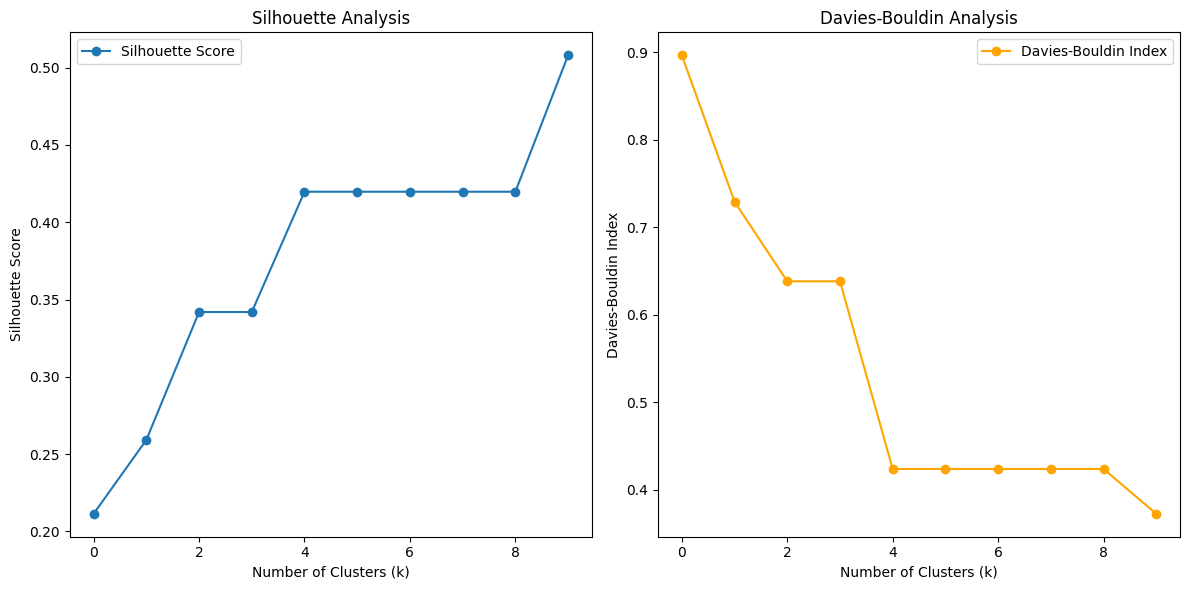

In [6]:
results_df['index'] = range(10)
# Plot Silhouette Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(results_df['index'], results_df['Silhouette_Score'], marker='o', label='Silhouette Score')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()

# Plot Davies-Bouldin Index
plt.subplot(1, 2, 2)
plt.plot(results_df['index'], results_df['DBI'], marker='o', color='orange', label='Davies-Bouldin Index')
plt.title('Davies-Bouldin Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.legend()
plt.tight_layout()
plt.show()


# **best Silhouette Score**

In [7]:
best_silhouette

unique                 [0, 1]
frequency           [2023, 1]
Bandwidth            8.230845
Num_Clusters                2
Silhouette_Score      0.50799
DBI                  0.372822
CH                    6.85193
Name: 9, dtype: object

In [8]:
# Apply MeanShift clustering
Sil_model = MeanShift(bandwidth=best_silhouette.Bandwidth)
sil_labels = Sil_model.fit_predict(X_pca)

# Evaluate clustering quality

print(f"The average silhouette score for GMM is: {silhouette_score(X_pca, sil_labels)}")
print(f"The Davies-Bouldin Index for GMM is: {davies_bouldin_score(X_pca, sil_labels)}")
print(f"The Calinski-Harabasz Index for GMM is: {calinski_harabasz_score(X_pca, sil_labels)}")

The average silhouette score for GMM is: 0.5079903307420799
The Davies-Bouldin Index for GMM is: 0.3728221435379064
The Calinski-Harabasz Index for GMM is: 6.851929660418674


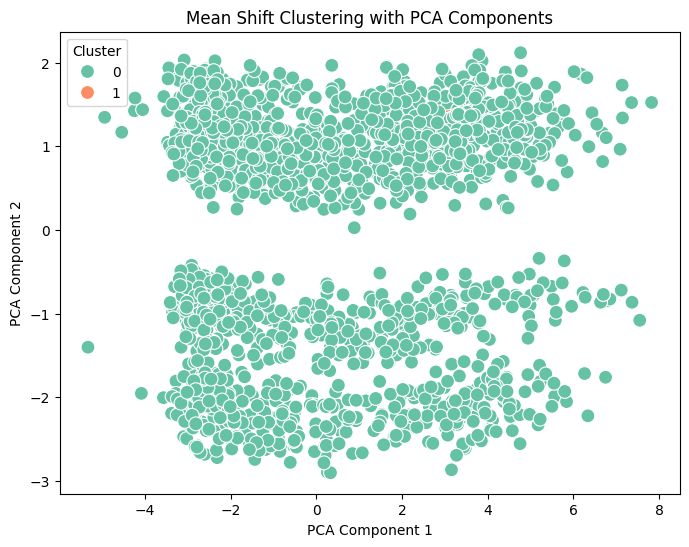

In [9]:
# Visualize the DBSCAN clusters in the PCA space
plt.figure(figsize=(8, 6))

# Scatter plot: Points labeled by their cluster assignment
sns.scatterplot(x=X_pca[0], y=X_pca[2], hue=sil_labels, palette='Set2', s=100)

plt.title('Mean Shift Clustering with PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

In [10]:
unique, frequency = np.unique(sil_labels, 
                              return_counts = True)
# print unique values array
print("Unique Values:", 
      unique)
 
# print frequency array
print("Frequency Values:",
      frequency)

Unique Values: [0 1]
Frequency Values: [2023    1]


# **davies bouldin index**

In [11]:
best_dbi

unique                 [0, 1]
frequency           [2023, 1]
Bandwidth            8.230845
Num_Clusters                2
Silhouette_Score      0.50799
DBI                  0.372822
CH                    6.85193
Name: 9, dtype: object

In [12]:
# Apply MeanShift clustering
dbi_model = MeanShift(bandwidth=best_dbi.Bandwidth)
dbi_labels = dbi_model.fit_predict(X_pca)

# Evaluate clustering quality

print(f"The average silhouette score for GMM is: {silhouette_score(X_pca, dbi_labels)}")
print(f"The Davies-Bouldin Index for GMM is: {davies_bouldin_score(X_pca, dbi_labels)}")
print(f"The Calinski-Harabasz Index for GMM is: {calinski_harabasz_score(X_pca, dbi_labels)}")

The average silhouette score for GMM is: 0.5079903307420799
The Davies-Bouldin Index for GMM is: 0.3728221435379064
The Calinski-Harabasz Index for GMM is: 6.851929660418674


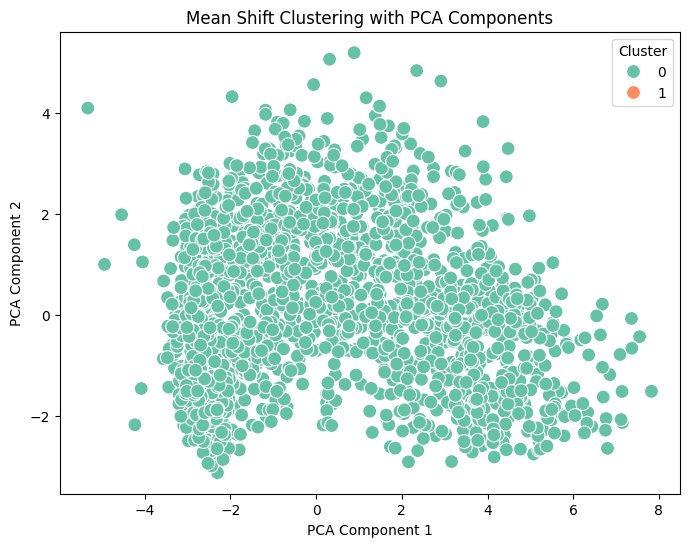

In [13]:
# Visualize the Mean Shift Clustering in the PCA space
plt.figure(figsize=(8, 6))

# Scatter plot: Points labeled by their cluster assignment
sns.scatterplot(x=X_pca[0], y=X_pca[1], hue=dbi_labels, palette='Set2', s=100)

plt.title('Mean Shift Clustering with PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

In [14]:
unique, frequency = np.unique(dbi_labels, 
                              return_counts = True)
# print unique values array
print("Unique Values:", 
      unique)
 
# print frequency array
print("Frequency Values:",
      frequency)

Unique Values: [0 1]
Frequency Values: [2023    1]


# **calinski_harabasz_index**

In [15]:
best_ch

unique                  [0, 1, 2, 3, 4, 5, 6]
frequency           [1990, 2, 1, 1, 27, 2, 1]
Bandwidth                            5.706573
Num_Clusters                                7
Silhouette_Score                     0.211427
DBI                                  0.896322
CH                                  11.071963
Name: 0, dtype: object

In [16]:
# Apply MeanShift clustering
Ch_model = MeanShift(bandwidth=best_ch.Bandwidth)
ch_labels = Ch_model.fit_predict(X_pca)

# Evaluate clustering quality

print(f"The average silhouette score for GMM is: {silhouette_score(X_pca, ch_labels)}")
print(f"The Davies-Bouldin Index for GMM is: {davies_bouldin_score(X_pca, ch_labels)}")
print(f"The Calinski-Harabasz Index for GMM is: {calinski_harabasz_score(X_pca, ch_labels)}")

The average silhouette score for GMM is: 0.2114268181989734
The Davies-Bouldin Index for GMM is: 0.8963215103186845
The Calinski-Harabasz Index for GMM is: 11.071962910312527


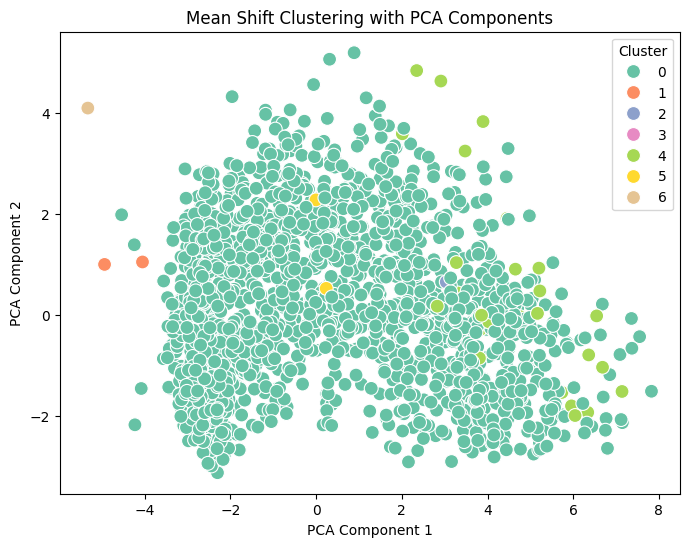

In [17]:
# Visualize the Mean Shift Clustering in the PCA space
plt.figure(figsize=(8, 6))

# Scatter plot: Points labeled by their cluster assignment
sns.scatterplot(x=X_pca[0], y=X_pca[1], hue=ch_labels, palette='Set2', s=100)

plt.title('Mean Shift Clustering with PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

In [18]:
unique, frequency = np.unique(ch_labels, 
                              return_counts = True)
# print unique values array
print("Unique Values:", 
      unique)
 
# print frequency array
print("Frequency Values:",
      frequency)

Unique Values: [0 1 2 3 4 5 6]
Frequency Values: [1990    2    1    1   27    2    1]


****

# **Mlflow**

In [19]:

for i in range(5):
    result.append((best_silhouette[i],best_ch[i],best_dbi[i]))
    

In [20]:
best_silhouette

unique                 [0, 1]
frequency           [2023, 1]
Bandwidth            8.230845
Num_Clusters                2
Silhouette_Score      0.50799
DBI                  0.372822
CH                    6.85193
Name: 9, dtype: object

In [21]:
results_df

,unique,frequency,Bandwidth,Num_Clusters,Silhouette_Score,DBI,CH,index
0,"[0, 1, 2, 3, 4, 5, 6]","[1990, 2, 1, 1, 27, 2, 1]",5.706573,7,0.211427,0.896322,11.071963,0
1,"[0, 1, 2, 3, 4, 5]","[2016, 3, 2, 1, 1, 1]",5.987048,6,0.259203,0.729197,5.899437,1
2,"[0, 1, 2, 3]","[2019, 3, 1, 1]",6.267523,4,0.341925,0.638235,7.375376,2
3,"[0, 1, 2, 3]","[2019, 3, 1, 1]",6.547997,4,0.341925,0.638235,7.375376,3
4,"[0, 1, 2]","[2022, 1, 1]",6.828472,3,0.419727,0.423998,5.788572,4
5,"[0, 1, 2]","[2022, 1, 1]",7.108947,3,0.419727,0.423998,5.788572,5
6,"[0, 1, 2]","[2022, 1, 1]",7.389421,3,0.419727,0.423998,5.788572,6
7,"[0, 1, 2]","[2022, 1, 1]",7.669896,3,0.419727,0.423998,5.788572,7
8,"[0, 1, 2]","[2022, 1, 1]",7.950370,3,0.419727,0.423998,5.788572,8
9,"[0, 1]","[2023, 1]",8.230845,2,0.507990,0.372822,6.851930,9


In [22]:
best_ch

unique                  [0, 1, 2, 3, 4, 5, 6]
frequency           [1990, 2, 1, 1, 27, 2, 1]
Bandwidth                            5.706573
Num_Clusters                                7
Silhouette_Score                     0.211427
DBI                                  0.896322
CH                                  11.071963
Name: 0, dtype: object

In [23]:
mlflow.set_experiment("MS_Clustering")

with mlflow.start_run(run_name=f"Ch_Mean Shift Clustering "):
        try:
            # Log parameters and metrics from results_df
            mlflow.log_param("index", "Mean Shift Clustering ")
            mlflow.log_param("n_clusters", best_ch.Num_Clusters)
            mlflow.log_metric("Silhouette_Score", best_ch.Silhouette_Score)
            mlflow.log_metric("davies_bouldin_index", best_ch.DBI)
            mlflow.log_metric("calinski_harabasz_index", best_ch.CH)

            print(f"Logged metrics for index Mean Shift Clustering andlusters_formed {best_ch.Num_Clusters}")

        except Exception as e:
            print(f"Error with index Mean Shift Clustering and bandwidth  {best_ch.Num_Clusters}")
            mlflow.log_param("error", str(e))

Logged metrics for index Mean Shift Clustering andlusters_formed 7


In [24]:
mlflow.set_experiment("MS_Clustering")

with mlflow.start_run(run_name=f"Sil_Mean Shift Clustering "):
        try:
            # Log parameters and metrics from results_df
            mlflow.log_param("index", "Mean Shift Clustering 1")
            mlflow.log_param("n_clusters", best_silhouette.Num_Clusters)
            mlflow.log_metric("Silhouette_Score", best_silhouette.Silhouette_Score)
            mlflow.log_metric("davies_bouldin_index", best_silhouette.DBI)
            mlflow.log_metric("calinski_harabasz_index", best_silhouette.CH)

            print(f"Logged metrics for index Mean Shift Clustering andlusters_formed {best_silhouette.Num_Clusters}")

        except Exception as e:
            print(f"Error with index Mean Shift Clustering and bandwidth  {best_silhouette.Num_Clusters}")
            mlflow.log_param("error", str(e))

Logged metrics for index Mean Shift Clustering andlusters_formed 2


In [25]:
mlflow.set_experiment("MS_Clustering")

with mlflow.start_run(run_name=f"dbi_Mean Shift Clustering "):
        try:
            # Log parameters and metrics from results_df
            mlflow.log_param("index", "Mean Shift Clustering ")
            mlflow.log_param("n_clusters", best_dbi.Num_Clusters)
            mlflow.log_metric("Silhouette_Score", best_dbi.Silhouette_Score)
            mlflow.log_metric("davies_bouldin_index", best_dbi.DBI)
            mlflow.log_metric("calinski_harabasz_index", best_dbi.CH)

            print(f"Logged metrics for index Mean Shift Clustering andlusters_formed {best_dbi.Num_Clusters}")

        except Exception as e:
            print(f"Error with index Mean Shift Clustering and bandwidth  {best_dbi.Num_Clusters}")
            mlflow.log_param("error", str(e))

Logged metrics for index Mean Shift Clustering andlusters_formed 2
